# AI... ML... Data Science... oOOooO Scary
<br>

# <><><><><><><><><><><><><><><><><><><><><><><><><><>

<br>

# "Why is Bitcoin going up/down?"
## Trading volume? Google Searches? Tether issuance?

## Let's find out!

<br>
<br>
<br>

# 1) Import packages

*pandas* : your data science go-to, build datasets incredibly easily

*matplotlib* : for charts, visualize your data

*sklearn* : for machine learning, train and test statistical models



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics

# Other stuff
import itertools
import numpy as np

<br>

# 2) Clean data

## Tweak your data for analysis

In [2]:
# Get .csv file as dataframe
data = pd.read_csv('btc_daily.csv')
print(data)

# Add next-day price column to simulate prediction
closes = list(data['close'])
closes.insert(0, np.nan)
closes.pop()
data['next_close'] = closes

# Only include full rows
data = data.iloc[1:1750]

# Expand Google Trends column from weekly to daily by repeating values x7
trends = list(data['google_trends'])
data['google_trends'] = list(itertools.chain.from_iterable(itertools.repeat(x, 7) for x in trends))[:1749]
    
# Replace NaN with previous value in column to normalize
sp = list(data['sp500'])

for index, price in enumerate(sp):
    if np.isnan(price):
        sp[index] = sp[index-1]

data['sp500'] = sp

# Show data
print(data)

           date  ticker      open      high       low     close   vol_btc  \
0     9/27/2019  BTCUSD   8060.00   8289.00   7861.02   8289.00  12634.65   
1     9/26/2019  BTCUSD   8438.35   8464.08   7712.45   8060.00  25063.02   
2     9/25/2019  BTCUSD   8530.01   8743.86   8222.01   8438.35  23161.99   
3     9/24/2019  BTCUSD   9693.74   9777.16   8159.35   8530.01  31693.09   
4     9/23/2019  BTCUSD  10026.80  10051.15   9609.37   9693.74  10409.03   
5     9/22/2019  BTCUSD   9973.99  10097.00   9848.37  10026.80   5113.54   
6     9/21/2019  BTCUSD  10168.85  10170.15   9917.34   9973.99   4829.81   
7     9/20/2019  BTCUSD  10275.01  10309.84  10056.30  10168.85   6147.42   
8     9/19/2019  BTCUSD  10155.26  10379.15   9585.86  10275.01  13548.83   
9     9/18/2019  BTCUSD  10185.39  10258.00  10074.08  10155.26   5564.14   
10    9/17/2019  BTCUSD  10262.54  10276.18  10135.44  10185.39   5710.49   
11    9/16/2019  BTCUSD  10304.46  10379.98  10068.42  10262.54   7384.74   

<br>

# 3) Build model

## Quantify the relationship between variables

* X / Input / Independent / Predictor variables
    * Trading volume
    * Tether issuance
    * Google Trends


* Y / Output / Dependent / Response variable
    * Bitcoin price

<br>    

## 3a) Create datasets for variables

* X predictor matrix and Y response vector
* Split datasets into *train* and *test* data

In [3]:
# Get input values from dataframe
x = data[['vol_btc', 'usdt_supply', 'google_trends', 'sp500']].copy().values
print(x)
print()

# Get output values from dataframe
y = list(data['next_close'])
print(y)
print()

# Separate train and test data
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=.25)

print(x_train.shape)
print(len(y_train))
print()
print(x_test.shape)
print(len(y_test))


[[2.50630200e+04 3.02000000e+09 6.00000000e+00 2.97762012e+03]
 [2.31619900e+04 3.02000000e+09 6.00000000e+00 2.98487012e+03]
 [3.16930900e+04 3.02000000e+09 6.00000000e+00 2.96660010e+03]
 ...
 [5.46600000e-01 1.00000000e+02 2.00000000e+00 1.68155005e+03]
 [1.50100000e+01 1.00000000e+02 2.00000000e+00 1.68155005e+03]
 [5.65600000e-02 1.00000000e+02 2.00000000e+00 1.68155005e+03]]

[8289.0, 8060.0, 8438.35, 8530.01, 9693.74, 10026.8, 9973.99, 10168.85, 10275.01, 10155.26, 10185.39, 10262.54, 10304.46, 10360.25, 10365.93, 10423.72, 10160.2, 10093.01, 10310.0, 10398.97, 10484.37, 10308.92, 10574.73, 10581.84, 10628.48, 10381.26, 9766.52, 9600.86, 9582.42, 9495.0, 9714.31, 10171.85, 10361.65, 10138.72, 10147.96, 10410.85, 10107.15, 10130.0, 10769.09, 10920.0, 10315.48, 10217.79, 10352.78, 10300.01, 10025.86, 10854.92, 11389.28, 11540.76, 11280.95, 11856.1, 11981.0, 11975.03, 11465.49, 11819.49, 10977.51, 10820.76, 10533.01, 10405.94, 10087.3, 9589.01, 9495.01, 9533.0, 9479.98, 9843.0, 988


<br>

## 3b) Fit model

* Use train data to fit a statistical model
* Use test data to make predictions
* Show results

In [4]:
# Fit linear regression model
model_lin = linear_model.LinearRegression()
model_lin.fit(x_train, y_train)

# Make predictions based on test inputs
pred_lin = model_lin.predict(x_test)
print(pred_lin)
print()

# Score predictions with test outputs and print results
print('--LINEAR REGRESSION RESULTS--')
print(model_lin.coef_)
print(metrics.explained_variance_score(y_test, pred_lin))
print(metrics.r2_score(y_test, pred_lin))
print(metrics.mean_squared_error(y_test, pred_lin))

[  782.01145037   558.74340578   234.11225704   396.92510473
   703.86361953   465.85188441  6745.58399794   957.19717405
   403.37511338  1274.3555209   6586.09355211  3749.31877396
   487.77809953   616.41509304   746.07987722  7369.43286611
  7164.63583022   519.15243291  8216.69665273  7156.07037723
   394.86520956   598.11200944   679.05062276  3051.7258947
  6766.48458431  7172.99212331   984.00159403  6580.60306771
   976.85914702   793.91090068  2108.51737763   234.11272594
  6746.28136153  8000.07348664  6522.48261612  6124.74398671
   756.52943655   604.64869263  7065.30464433   620.21626391
   624.6328302   7042.90615075  8455.10625906   887.42322282
   391.63079      695.32807722  7944.24955708   883.44307991
  6971.88449577   376.75624293  6485.26084263  7015.57879039
  6790.76324364   933.38431162   730.32224414  2224.96101942
   601.60431839  7968.10080353  1013.06411191   818.96019382
  7378.8310446    384.97086675  3019.40300408  6784.78174642
   328.91902321   519.295


<br>

## 3c) Optimize

* Feature selection
    * Check the significance of your inputs
    * Consider under/overfitting
    
* Data transformation
    * Normalize your inputs
    * Try log() 


In [5]:
import statsmodels.api as sm
from sklearn.feature_selection import SelectKBest, f_regression

# Linear model summary, check t-values (significance) of inputs
lm = sm.OLS(y, x)
lm = lm.fit()
print(lm.summary())
print()

# Correlation matrix
print(data[['vol_btc', 'usdt_supply', 'google_trends', 'sp500', 'next_close']].copy().corr())
print()

# Feature selection by f-test
f_test = SelectKBest(f_regression, k=2).fit(x, y)
print(f_test.scores_)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.926
Model:                            OLS   Adj. R-squared (uncentered):              0.926
Method:                 Least Squares   F-statistic:                              5493.
Date:                Thu, 03 Oct 2019   Prob (F-statistic):                        0.00
Time:                        04:32:17   Log-Likelihood:                         -15227.
No. Observations:                1749   AIC:                                  3.046e+04
Df Residuals:                    1745   BIC:                                  3.048e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------


<br>

# 4) Visualize Data

## Scatterplots:
* Predictions vs. Real Values
* Each Input vs. Output
* Residuals vs. Predictions (should be uncorrelated)

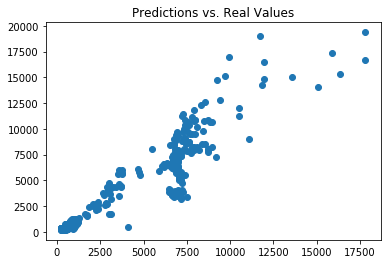

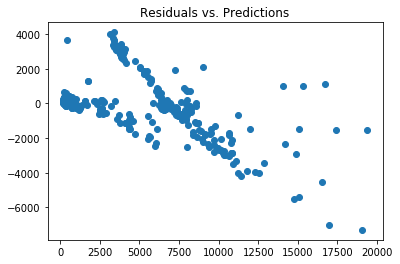

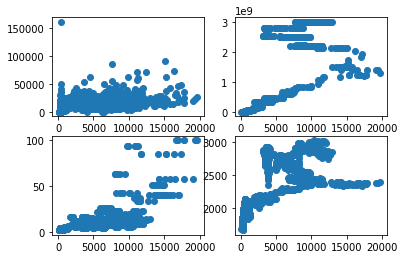

In [6]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots()
axes.scatter(pred_lin, y_test)
plt.title("Predictions vs. Real Values")
plt.show()

fig, axes = plt.subplots()
axes.scatter(y_test, pred_lin - y_test)
plt.title("Residuals vs. Predictions")
plt.show()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)

ax1.scatter(data['next_close'], data['vol_btc'])
ax2.scatter(data['next_close'], data['usdt_supply'])
ax3.scatter(data['next_close'], data['google_trends'])
ax4.scatter(data['next_close'], data['sp500'])
plt.show()


<br>

# 6) Push the limits

## Cool... so can we break this thing?

* We can try! Let's build a neural network
    * Multiple layers of nodes tweak each input slightly
    * Can model non-linear relationships
    * Resistant to wacky input data
    


In [7]:
from sklearn.neural_network import MLPRegressor

# Fit model
nn = MLPRegressor(activation='identity', solver='lbfgs', hidden_layer_sizes=(3, 5))
nn.fit(x_train, y_train)

# Predict and score
pred_nn = nn.predict(x_test)
print(nn.coefs_)
print(metrics.r2_score(y_test, pred_nn))
print(metrics.mean_squared_error(y_test, pred_nn))

[array([[-0.59916052, -0.66168385,  0.79539644],
       [-0.32033863,  0.10880746, -0.05694989],
       [-0.24245663, -0.76444988, -0.24638589],
       [ 0.68344165,  0.60009872, -0.60849707]]), array([[-0.62379098, -0.78467889,  0.40812711,  0.06916418,  0.23178663],
       [ 0.54483118, -0.41150943, -0.46524577,  0.16066941, -0.04737353],
       [-0.56278818, -0.16005051, -0.0041087 , -0.39708895, -0.23502883]]), array([[-0.31233841],
       [-0.10380704],
       [-0.32352097],
       [ 0.30616642],
       [-0.7458671 ]])]
0.6248596743227202
6277298.712198246
